In [124]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import itertools

In [125]:
file_path = r"C:\Users\jens.nilsen\OneDrive - Bouvet Norge AS\Documents\GitHub\trfkaipoc\data_2022-2025.csv"
df = pd.read_csv(file_path, sep=";")

In [126]:
df = df[df["EGS.VEDTAK.10670"].notna()]

In [127]:
df['Avslag_ind'] = df['EGS.VEDTAK.10670'].apply(lambda x: 1 if x == "Avslag" else 0)

In [128]:
andel_avslag=df['Avslag_ind'].sum()/df['Avslag_ind'].count()

In [129]:
andel_avslag

0.0405982905982906

In [130]:
antall_avslag=df['Avslag_ind'].sum()

In [131]:
antall_avslag

19

In [132]:
# Feature selection (expand as needed)
num_features = ['Avslag_ind',
    "ÅDT, total",
    "ÅDT, andel lange kjøretøy",
    "Fartsgrense",
    "Avkjørsler",
    "Trafikkulykker",
    "Kurvatur, horisontal", 
    "Kurvatur, stigning"
]
df_num=df[num_features]


In [133]:
df_num

,Avslag_ind,"ÅDT, total","ÅDT, andel lange kjøretøy",Fartsgrense,Avkjørsler,Trafikkulykker,"Kurvatur, horisontal","Kurvatur, stigning"
0,0,550.0,11.0,80.0,11,1,-405.0,-0.5
1,0,293.0,7.0,60.0,8,1,-415.0,-1.0
2,0,1500.0,13.0,80.0,2,4,182.0,0.7
3,0,15000.0,6.0,50.0,9,50,99999.0,-0.3
4,0,2980.0,12.0,80.0,5,8,99999.0,2.4
...,...,...,...,...,...,...,...,...
463,1,1300.0,6.0,30.0,21,0,-1520.0,-0.5
464,0,500.0,10.0,60.0,12,2,-1119.0,0.2
465,0,400.0,13.0,60.0,12,0,-192.0,5.5
466,0,1600.0,15.0,80.0,8,6,-524.0,-3.0


In [134]:
df_num=df_num.dropna()

In [135]:
df_num

,Avslag_ind,"ÅDT, total","ÅDT, andel lange kjøretøy",Fartsgrense,Avkjørsler,Trafikkulykker,"Kurvatur, horisontal","Kurvatur, stigning"
0,0,550.0,11.0,80.0,11,1,-405.0,-0.5
1,0,293.0,7.0,60.0,8,1,-415.0,-1.0
2,0,1500.0,13.0,80.0,2,4,182.0,0.7
3,0,15000.0,6.0,50.0,9,50,99999.0,-0.3
4,0,2980.0,12.0,80.0,5,8,99999.0,2.4
...,...,...,...,...,...,...,...,...
463,1,1300.0,6.0,30.0,21,0,-1520.0,-0.5
464,0,500.0,10.0,60.0,12,2,-1119.0,0.2
465,0,400.0,13.0,60.0,12,0,-192.0,5.5
466,0,1600.0,15.0,80.0,8,6,-524.0,-3.0


In [136]:
y = df_num['Avslag_ind']        # target
X = df_num.drop(columns=['Avslag_ind'])  # all other columns

In [137]:
#scaler = RobustScaler()
#X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [138]:
# Fit logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

LogisticRegression(max_iter=1000)

In [139]:
yp=model.predict_proba(X)

In [140]:
y

0      0
1      0
2      0
3      0
4      0
      ..
463    1
464    0
465    0
466    0
467    0
Name: Avslag_ind, Length: 456, dtype: int64

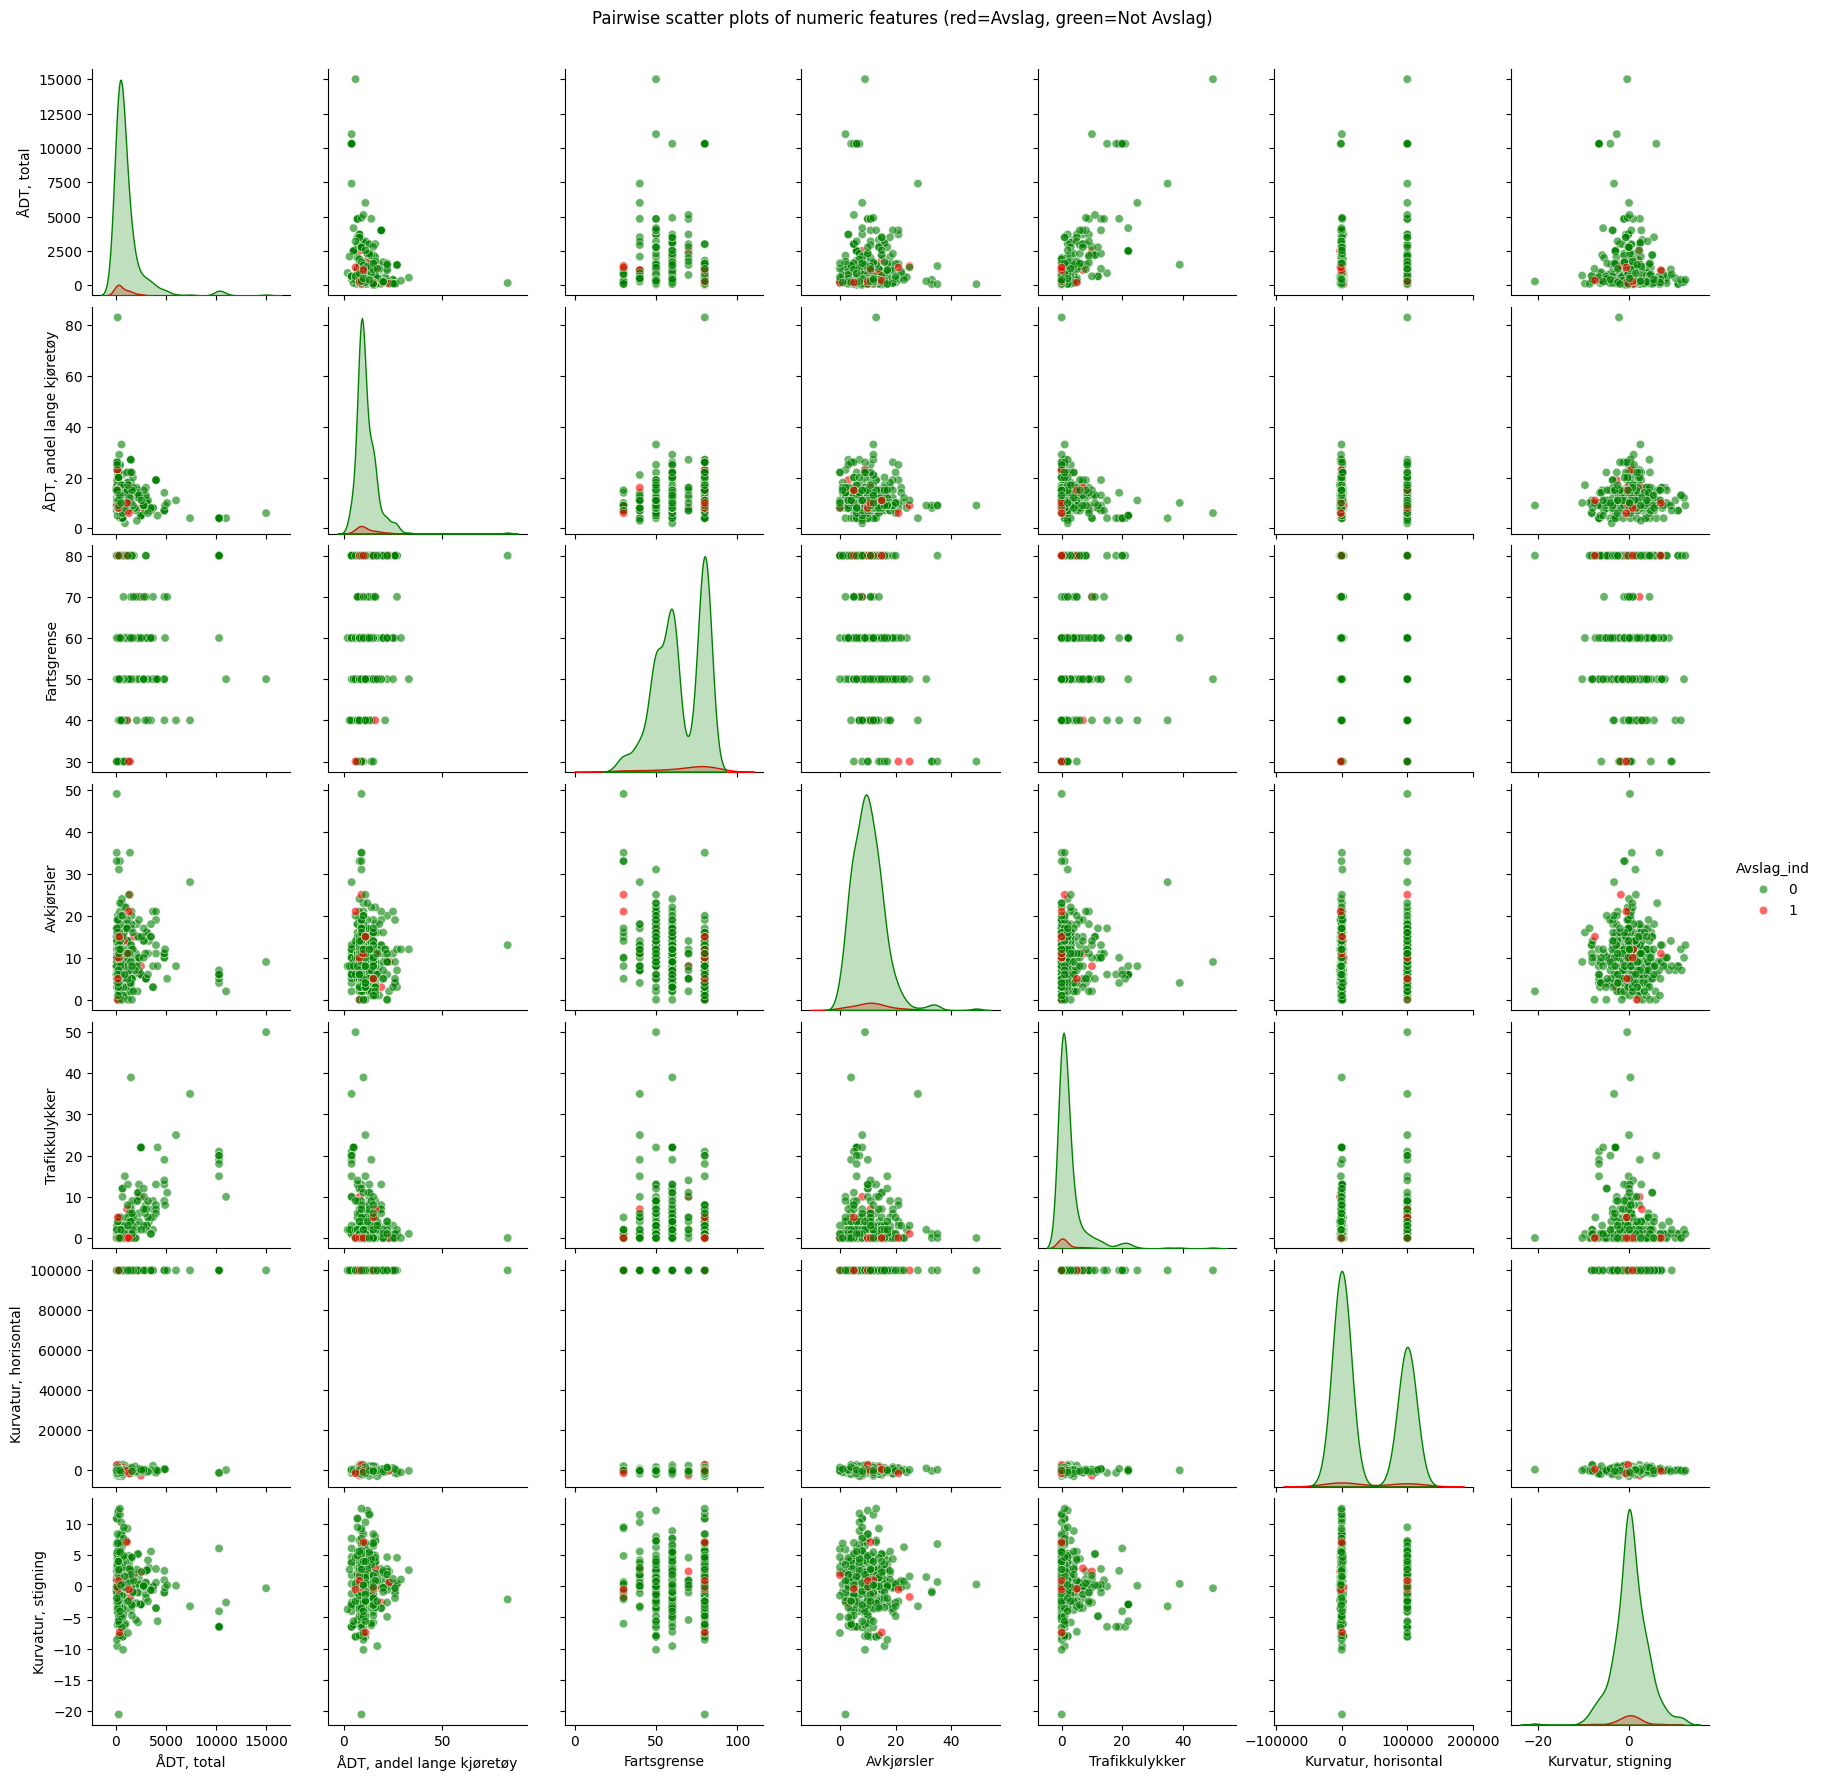

In [141]:
df_plot = X.copy()
df_plot['Avslag_ind'] = y

# Map colors: 1 = Avslag (red), 0 = Not Avslag (green)
palette = {1: "red", 0: "green"}

# Pairplot of all numeric features
sns.pairplot(df_plot, vars=X.columns, hue='Avslag_ind', palette=palette, plot_kws={'alpha':0.6})
plt.suptitle("Pairwise scatter plots of numeric features (red=Avslag, green=Not Avslag)", y=1.02)
plt.show()

In [142]:
interactions = {}
for f1, f2 in itertools.combinations(X.columns, 2):
    col_name = f"{f1}_x_{f2}"
    df_num[col_name] = df_num[f1] * df_num[f2]
    interactions[col_name] = df_num[col_name].corr(y)

# Sort by absolute correlation
interactions_sorted = dict(sorted(interactions.items(), key=lambda item: abs(item[1]), reverse=True))
print("Top interactions by correlation with Avslag_ind:")
for k,v in list(interactions_sorted.items())[:10]:
    print(f"{k}: {v:.4f}")

Top interactions by correlation with Avslag_ind:
ÅDT, total_x_ÅDT, andel lange kjøretøy: -0.0569
ÅDT, total_x_Fartsgrense: -0.0499
Fartsgrense_x_Trafikkulykker: -0.0419
Avkjørsler_x_Trafikkulykker: -0.0403
Trafikkulykker_x_Kurvatur, stigning: 0.0375
ÅDT, total_x_Trafikkulykker: -0.0336
Fartsgrense_x_Avkjørsler: 0.0319
ÅDT, andel lange kjøretøy_x_Trafikkulykker: -0.0299
ÅDT, total_x_Kurvatur, stigning: 0.0289
ÅDT, total_x_Kurvatur, horisontal: -0.0243


C:\Users\jens.nilsen\AppData\Local\Temp\ipykernel_22376\2129243993.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[col_name] = df_num[f1] * df_num[f2]
C:\Users\jens.nilsen\AppData\Local\Temp\ipykernel_22376\2129243993.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num[col_name] = df_num[f1] * df_num[f2]
C:\Users\jens.nilsen\AppData\Local\Temp\ipykernel_22376\2129243993.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

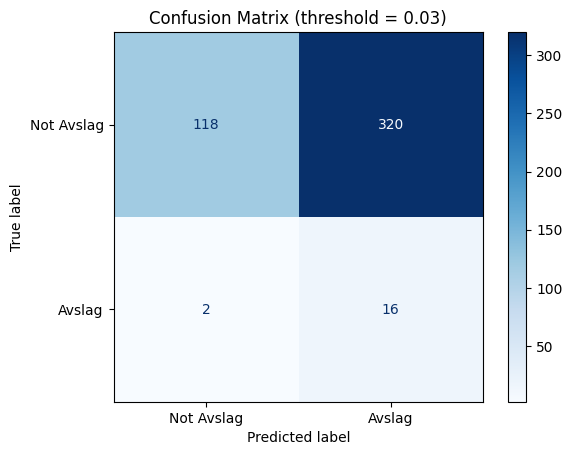

In [149]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predicted probabilities for class "1"
y_prob = model.predict_proba(X)[:, 1]

# Adjustable threshold
threshold = 0.03  # 👈 change this value between 0 and 1

# Convert probabilities to class predictions
y_pred = (y_prob >= threshold).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Avslag", "Avslag"])

# Plot
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix (threshold = {threshold})")
plt.show()